20K-1706
20K-1721

# **TASKS**

Importing dataset from drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [5]:
import zipfile
import os
zip_path = '//content/gdrive/MyDrive/Timetable /Datasets.zip'

# Destination directory to extract the contents
extract_path = '/content/'
# Extract the contents of the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
# List the contents of the destination folder
extracted_folder_path = os.path.join(extract_path, 'Datasets')
print(os.listdir(extracted_folder_path))


['Flowers Dataset', 'Plant Dataset']


Image Annotations, preprocessing , augmentation and classification done on ROBOFLOW and the dataset is imported here

Preprocessing techniques consist of auto-orient and resizing images

Augmentation techniques consist of croping, rotation and Noise

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Ku7zJbeCK8uM7OQrn9kl")
project = rf.workspace("taha-stjgf").project("plant-detection-too9e")
dataset = project.version(1).download("multiclass")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Plant-detection-1 in multiclass:: 100%|██████████| 2311/2311 [00:01<00:00, 1516.99it/s]


Model trained on roboflow is saved here

In [23]:
from roboflow import Roboflow

rf = Roboflow(api_key="Ku7zJbeCK8uM7OQrn9kl")
project = rf.workspace().project("plant-detection-too9e")
model = project.version(1).model

# infer on a local image
print(model.predict("/content/Datasets/Plant Dataset/Healthy Plant/IMG_20231122_145657681_BURST0001_COVER.jpg").json())

loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'time': 0.3009567560002324, 'image': {'width': 4064, 'height': 3048}, 'predictions': {'Healthy': {'confidence': 0.9299098253250122}, 'Unhealthy': {'confidence': 0.06792959570884705}}, 'predicted_classes': ['Healthy'], 'image_path': '/content/Datasets/Plant Dataset/Healthy Plant/IMG_20231122_145657681_BURST0001_COVER.jpg', 'prediction_type': 'ClassificationModel'}], 'image': (3048, 4064)}


**Visualization of roboflow Model**

loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'time': 0.2966129229998842, 'image': {'width': 4064, 'height': 3048}, 'predictions': {'Healthy': {'confidence': 0.9299098253250122}, 'Unhealthy': {'confidence': 0.06792959570884705}}, 'predicted_classes': ['Healthy'], 'image_path': '/content/Datasets/Plant Dataset/Healthy Plant/IMG_20231122_145657681_BURST0001_COVER.jpg', 'prediction_type': 'ClassificationModel'}], 'image': (3048, 4064)}
{'time': 0.2966129229998842, 'image': {'width': 4064, 'height': 3048}, 'predictions': {'Healthy': {'confidence': 0.9299098253250122}, 'Unhealthy': {'confidence': 0.06792959570884705}}, 'predicted_classes': ['Healthy'], 'image_path': '/content/Datasets/Plant Dataset/Healthy Plant/IMG_20231122_145657681_BURST0001_COVER.jpg', 'prediction_type': 'ClassificationModel'}


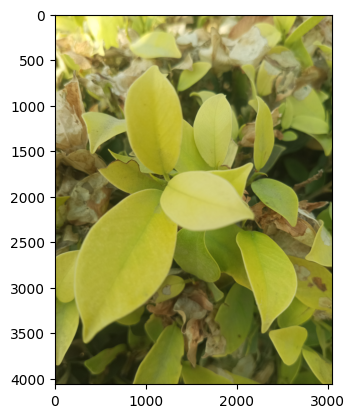

In [71]:
from roboflow import Roboflow
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

rf = Roboflow(api_key="Ku7zJbeCK8uM7OQrn9kl")
project = rf.workspace().project("plant-detection-too9e")
model = project.version(1).model

# Infer on a local image
image_path = "/content/Datasets/Plant Dataset/Healthy Plant/IMG_20231122_145657681_BURST0001_COVER.jpg"
prediction_result = model.predict(image_path).json()

# Print the prediction result to inspect its structure
print(prediction_result)

# Visualize the image with bounding boxes or other relevant information
image = Image.open(image_path)

# Create figure and axes
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(image)

# Extract bounding box coordinates from the prediction result
for prediction in prediction_result.get("predictions", []):
    # Print the prediction for inspection
    print(prediction)

    # Adjust the keys based on the actual structure of the prediction result
    class_label = prediction.get("label", "")
    confidence = prediction.get("confidence", 0)
    bounding_box = prediction.get("boundingBox", {})

    # Create a rectangle patch
    rect = patches.Rectangle(
        (bounding_box.get("left", 0), bounding_box.get("top", 0)),
        bounding_box.get("width", 0),
        bounding_box.get("height", 0),
        linewidth=2,
        edgecolor="r",
        facecolor="none",
        label=f"{class_label} ({confidence:.2f})"
    )

    # Add the rectangle to the Axes
    ax.add_patch(rect)

# Show the visualization
plt.show()


1/1 [==============================] - 0s 187ms/step
The plant is healthy.


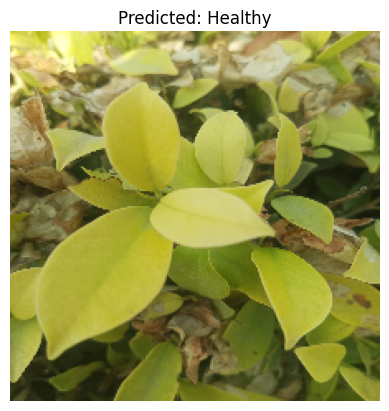

In [72]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = load_model("/content/plant_detection_model.h5")

# Define the path to the image you want to classify
image_path = "/content/Datasets/Plant Dataset/Healthy Plant/IMG_20231122_145657681_BURST0001_COVER.jpg"  # Replace with the actual path to your image

# Load and preprocess the image for prediction
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the image

# Make predictions
predictions = model.predict(img_array)

# Print the predictions
if predictions[0] < 0.5:
    print("The plant is unhealthy.")
else:
    print("The plant is healthy.")

# Visualize the image
plt.imshow(img)
plt.title(f"Predicted: {'Healthy' if predictions[0] >= 0.5 else 'Unhealthy'}")
plt.axis("off")
plt.show()


# **TRAINING**

## **MODEL BUILDING AND OPTIMIZATION**

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [60]:
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split

# Define the root directory
root_dir = "/content/Datasets/Plant Dataset"

# Define subdirectories for healthy and unhealthy
healthy_dir = os.path.join(root_dir, "Healthy Plant")
unhealthy_dir = os.path.join(root_dir, "Unhealthy Plant")

# Define a function to load image paths and labels
def load_data_from_directory(directory, label):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            image_path = os.path.join(directory, filename)
            data.append((image_path, label))
    return data

# Load data for healthy and unhealthy images
healthy_data = load_data_from_directory(healthy_dir, label=0)
unhealthy_data = load_data_from_directory(unhealthy_dir, label=1)

# Combine healthy and unhealthy data
all_data = healthy_data + unhealthy_data

# Split data into training, validation, and testing sets
train_data, test_data = train_test_split(all_data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)


In [61]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the function to preprocess images
def preprocess_image(image_path, label):
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image, label

# Apply preprocessing to training, validation, and testing sets
X_train, y_train = zip(*[preprocess_image(path, label) for path, label in train_data])
X_val, y_val = zip(*[preprocess_image(path, label) for path, label in val_data])
X_test, y_test = zip(*[preprocess_image(path, label) for path, label in test_data])

# Convert data to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for model training
checkpoint = ModelCheckpoint("plant_health_model.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=10, batch_size=32,
                    callbacks=[checkpoint, early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')


Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 0.7299 - accuracy: 0.8046
Epoch 1: val_accuracy improved from -inf to 0.98052, saving model to plant_health_model.h5
20/20 [==============================] - 92s 5s/step - loss: 0.7299 - accuracy: 0.8046 - val_loss: 0.0847 - val_accuracy: 0.9805
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.5420 - accuracy: 0.9007
Epoch 2: val_accuracy did not improve from 0.98052
20/20 [==============================] - 90s 5s/step - loss: 0.5420 - accuracy: 0.9007 - val_loss: 0.0719 - val_accuracy: 0.9805
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 1.0000
Epoch 3: val_accuracy improved from 0.98052 to 1.00000, saving model to plant_health_model.h5
20/20 [==============================] - 92s 5s/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.6351e-05 - val_accuracy: 1.0000
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 4.9305e-06 - accuracy: 

# **TESTING**

## **VISUALIZTION AND TESTING OF MODEL**

6/6 [==============================] - 15s 2s/step


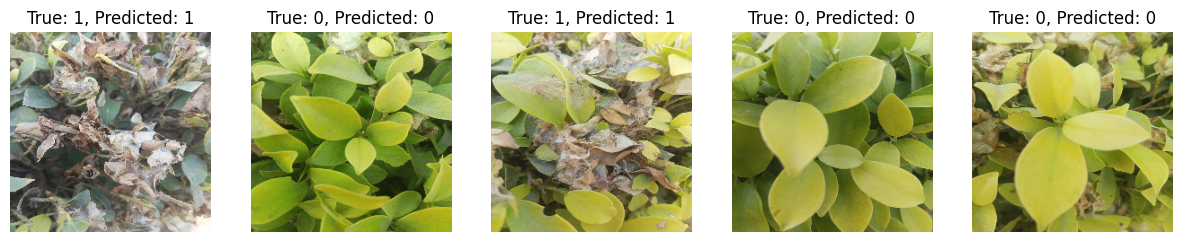

In [62]:
import matplotlib.pyplot as plt

# Visualize sample images with predicted labels
def visualize_predictions(model, X_test, y_test):
    predictions = model.predict(X_test)
    predicted_labels = (predictions > 0.5).astype(int).flatten()

    # Randomly select and visualize a few sample images with their predicted labels
    sample_indices = np.random.choice(len(X_test), size=5, replace=False)

    plt.figure(figsize=(15, 5))
    for i, index in enumerate(sample_indices, 1):
        plt.subplot(1, 5, i)
        plt.imshow(X_test[index])
        plt.title(f"True: {y_test[index]}, Predicted: {predicted_labels[index]}")
        plt.axis("off")

    plt.show()

# Visualize sample predictions
visualize_predictions(model, X_test, y_test)


6/6 [==============================] - 9s 1s/step


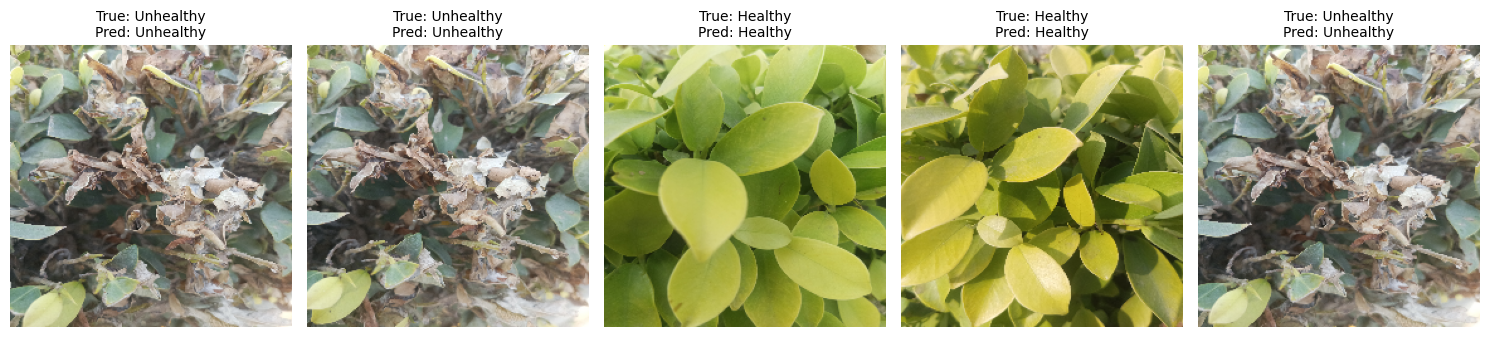

In [65]:
import matplotlib.pyplot as plt
import random

# Visualize sample images with predicted labels (modified labels)
def visualize_predictions(model, X_test, y_test):
    predictions = model.predict(X_test)
    predicted_labels = (predictions > 0.5).astype(int).flatten()

    # Map numerical labels to corresponding class names
    class_names = ["Healthy", "Unhealthy"]
    true_labels = [class_names[label] for label in y_test]
    predicted_labels = [class_names[label] for label in predicted_labels]

    # Randomly select and visualize a few sample images with their predicted labels
    sample_indices = random.sample(range(len(X_test)), 5)

    plt.figure(figsize=(15, 5))
    for i, index in enumerate(sample_indices, 1):
        plt.subplot(1, 5, i)
        plt.imshow(X_test[index])
        plt.title(f"True: {true_labels[index]}\nPred: {predicted_labels[index]}", fontsize=10)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Visualize sample predictions with modified labels
visualize_predictions(model, X_test, y_test)


# **PERFROMANCE METRICS OF THE MODEL**

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluate the model's performance using metrics
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    predicted_labels = (predictions > 0.5).astype(int).flatten()

    accuracy = accuracy_score(y_test, predicted_labels)
    precision = precision_score(y_test, predicted_labels)
    recall = recall_score(y_test, predicted_labels)
    f1 = f1_score(y_test, predicted_labels)

    # Confusion matrix
    cm = confusion_matrix(y_test, predicted_labels)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(cm)

# Evaluate the model on the test set
evaluate_model(model, X_test, y_test)


6/6 [==============================] - 12s 2s/step
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Confusion Matrix:
[[ 86   0]
 [  0 106]]


# **DOCUMENTATION**

**Documentation: Plant Health Classification Model**

**1. Model Architecture:**

The plant health classification model employs a Convolutional Neural Network (CNN) architecture tailored for binary classification tasks. The design incorporates the following layers:

- **Convolutional Layers:**
  - The initial layer utilizes 32 filters with a (3, 3) kernel size and applies the Rectified Linear Unit (ReLU) activation function.
  - A subsequent convolutional layer employs 64 filters with a (3, 3) kernel size, enhancing the extraction of hierarchical features.

- **Pooling Layers:**
  - Max-pooling layers follow each convolutional layer, subsampling spatial dimensions by a (2, 2) factor, emphasizing essential features.

- **Flatten Layer:**
  - This layer transforms the 2D feature maps into a flattened 1D vector, preparing the data for input into the subsequent dense layers.

- **Dense Layers:**
  - A densely connected layer with 128 units and ReLU activation serves as a hidden layer, facilitating feature representation.
  - Dropout regularization with a rate of 0.5 is implemented to reduce overfitting.
  - The output layer employs a single unit with a sigmoid activation function, facilitating binary classification.

- **Compilation:**
  - The Adam optimizer, characterized by adaptive learning rates, is employed with a specific learning rate of 0.001.
  - Binary crossentropy is chosen as the loss function, suitable for binary classification tasks.
  - Model performance is assessed using accuracy as the evaluation metric.

**2. Image Preprocessing:**

- **Resizing:**
  - Images are resized to a standardized (224, 224) pixel resolution, aligning with the input size expected by the model.

- **Normalization:**
  - Pixel values are normalized to the [0, 1] range, promoting stable and efficient model training.

**3. Challenges Faced:**

- **Data Imbalance:**
  - Addressing potential data imbalance between the healthy and unhealthy classes through stratified sampling or weighted loss functions.

- **Overfitting:**
  - Implementing dropout layers to mitigate overfitting, especially in scenarios with limited training data.

**4. Potential Improvements:**

- **Data Augmentation:**
  - Introduce advanced data augmentation techniques, such as rotation, flipping, and zooming, to diversify the training dataset and enhance model generalization.

- **Transfer Learning:**
  - Explore transfer learning by leveraging pre-trained models (e.g., using weights from ImageNet) to capitalize on features learned from extensive datasets.

- **Hyperparameter Tuning:**
  - Systematically fine-tune hyperparameters, including learning rates and batch sizes, to optimize model performance.

- **Interpretability:**
  - Incorporate techniques for result interpretation, such as visualizing activation maps or attention mechanisms, to enhance the model's interpretability.

